# Estimating Obesity: A Study of Eating Habits and Physical Condition

Name: Caterina Gallo, Sophia Mares, William Acuna

Date: 02/27/23

In [90]:
# Libraries to be used

#from numpy import random
import math
#import statistics
#import scipy.integrate as spi
#from scipy.stats import binom
#from scipy.stats import norm
#from scipy.stats import gamma
#from scipy.stats import t
#from statsmodels.stats.proportion import proportion_confint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import scipy.stats
from scipy.stats import anderson
from scipy.stats import beta
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.graphics.mosaicplot import mosaic

## Data Cleaning and Preparation

In this section, we access the datafile and save the variables. For each subject the body mass index is calculated and the obesity level is evaluated. 

In [97]:
dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv') # access and read data file 
print(dataset.head())
print('\n', dataset.tail())
gender = dataset['Gender'] # gender: Female or Male
age = dataset['Age'] # age [years]
height = dataset['Height'] # height [m]
weight = dataset['Weight'] # weight [kg]

# Eating habits attributes 
FAVC = dataset['FAVC'] # frequent consumption of high caloric food: yes or no
FCVC = round(dataset['FCVC']) # frequent consumption of vegetables: never, sometimes, always
label_FCVC = ['never', 'sometimes', 'always'] # label for FCVC corresponding to 1, 2, 3
FCVC = dataset['FCVC'].replace([1, 2, 3], label_FCVC) # 1, 2, 3 are now subsituted by never, sometimes, and always, respectively.
NCP = round(dataset['NCP']) # number of main meals: from 1 to 4
CAEC = dataset['CAEC'] # consumption of food between meals: no, sometimes, frequently, always
CH2O = round(dataset['CH2O']) # consumption of daily water: from 1 to 3 [l]
CALC = dataset['CALC'] # consumption of alcohol: no, sometimes, frequently, always
# Physical condition attributes
SCC = dataset['SCC'] # calories consumption monitoring: yes or no
FAF = round(dataset['FAF']) # physical activity frequency: from 0 to 5 days per week
TUE = round(dataset['TUE']) # time using technology: from 0 to 5 hours per day
MTRANS = dataset['MTRANS'] # transportation used: automobile, motorbike, bike, public transport, walking

# Other 
family_overweight = dataset['family_history_with_overweight'] # family history with overweight: yes or no
SMOKE = dataset['SMOKE'] # 

# Calculation of the body mass index and obesity level classification 
BMI = weight / np.power(height, 2) # body mass index [kg/m^2]
obesitylevel = np.empty(len(BMI)) # Underweight: 0, Normal: 1, Overweight: 2, Obesity I: 3, Obesity II: 4, Obesity III: 5. 
for jj in range(len(BMI)): 
    if BMI[jj] < 18.5:
        obesitylevel[jj] = 0
    if BMI[jj] >= 18.5 and BMI[jj] < 24.9:
        obesitylevel[jj] = 1
    if BMI[jj] >= 24.9 and BMI[jj] < 29.9:
        obesitylevel[jj] = 2
    if BMI[jj] >= 29.9 and BMI[jj] < 34.9:
        obesitylevel[jj] = 3
    if BMI[jj] >= 34.9 and BMI[jj] < 39.9:
        obesitylevel[jj] = 4
    if BMI[jj] >= 39.9:
        obesitylevel[jj] = 5
        
NObeyesdad = dataset['NObeyesdad'] # obesity level as saved in the dataset

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

## Exploratory Data Analysis (i)

Descriptive statistics is shown below. Data are analyzed through stacked barplots and hystograms. 

There are 1043 females and 1068 males.
Summary age for females 
 count    1043.00
mean       24.00
std         6.41
min        15.00
25%        19.63
50%        22.00
75%        26.00
max        61.00
Name: Age, dtype: float64
Summary weight for females 
 count    1043.00
mean       82.30
std        29.72
min        39.00
25%        58.00
50%        78.00
75%       105.04
max       165.06
Name: Weight, dtype: float64
Summary height for females 
 count    1043.00
mean        1.64
std         0.07
min         1.45
25%         1.60
50%         1.64
75%         1.70
max         1.84
Name: Height, dtype: float64
Summary BMI for females 
 count    1043.00
mean       30.13
std         9.40
min        13.00
25%        22.36
50%        28.47
75%        40.08
max        50.81
dtype: float64
Summary age for males 
 count    1068.00
mean       24.62
std         6.27
min        14.00
25%        20.00
50%        23.00
75%        27.93
max        56.00
Name: Age, dtype: float64
Summary weight for mal

<AxesSubplot:title={'center':'By smoke'}, xlabel='Obesity level'>

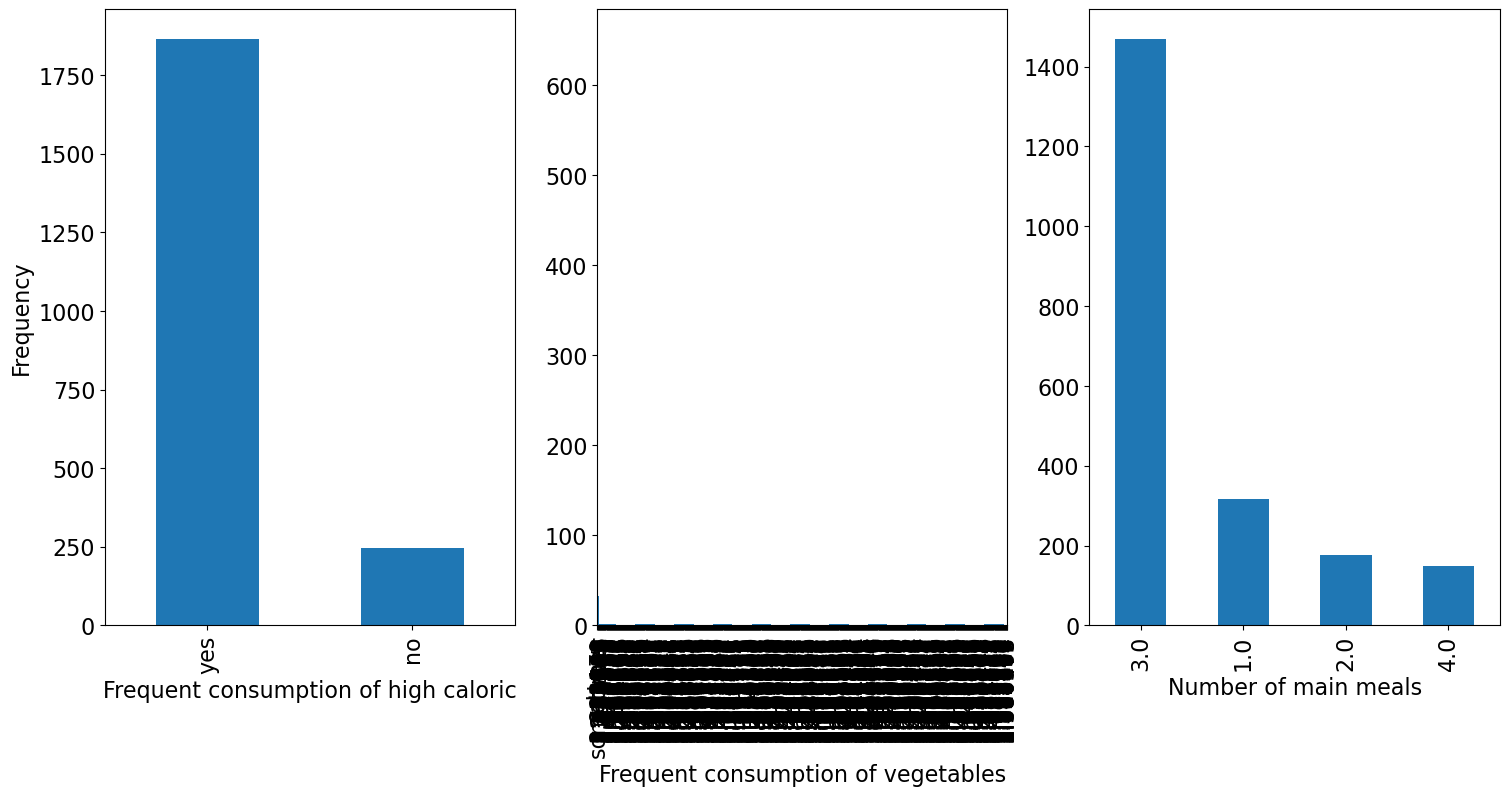

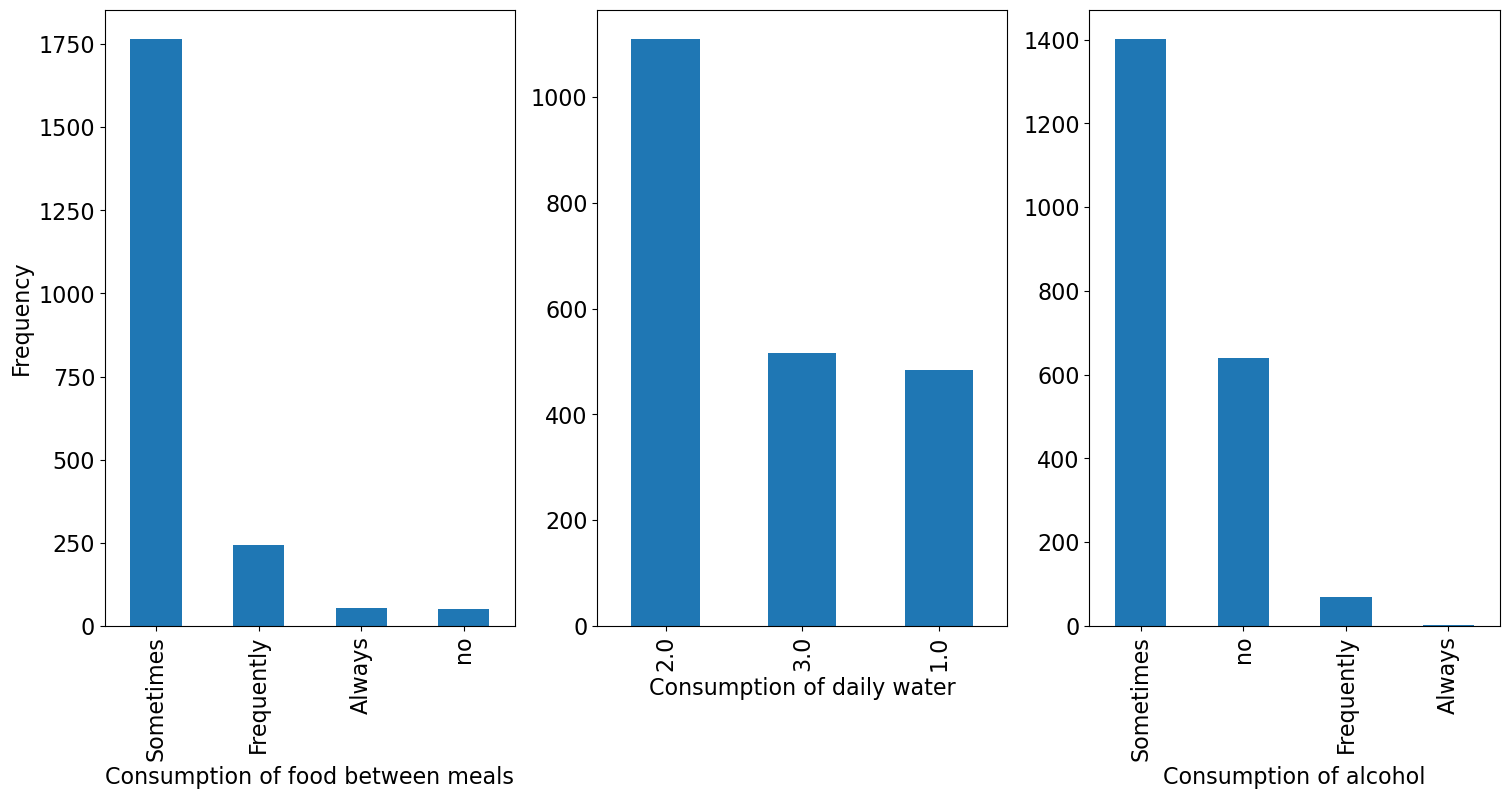

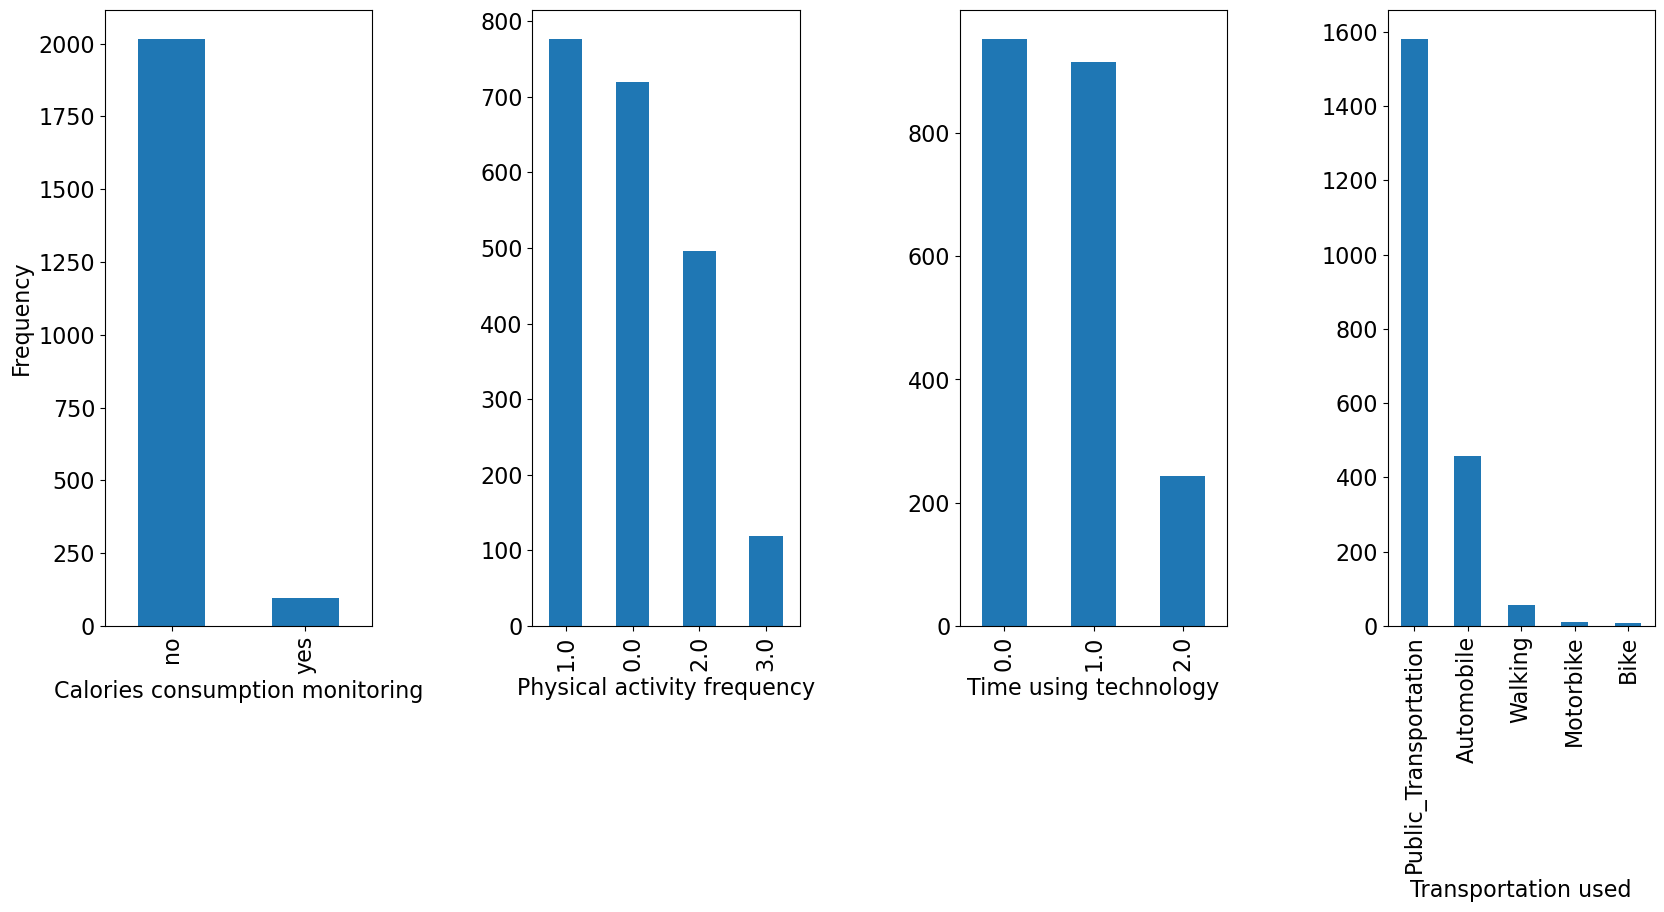

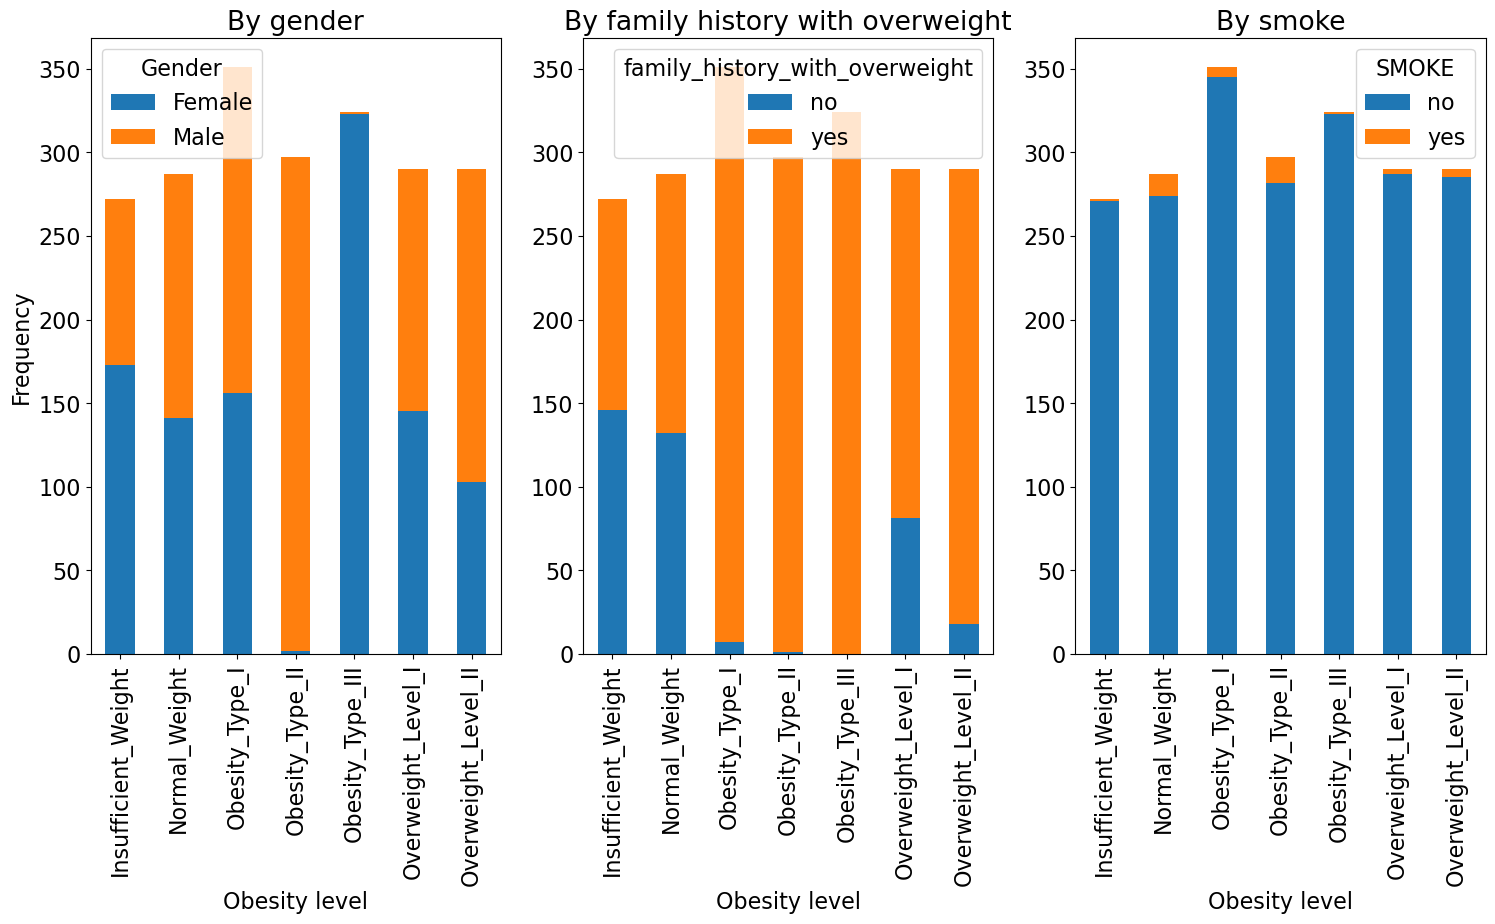

In [98]:
count_f = 0 # number of females
for jj in range(len(gender)):
    if gender[jj] == 'Female': 
        count_f = count_f + 1
count_m = len(gender) - count_f # number of males 
print('There are', count_f, 'females and', count_m, 'males.')

age_f = age.loc[dataset['Gender'] == 'Female'] # ages of females
age_m = age.loc[dataset['Gender'] == 'Male'] # ages of males
weight_f = weight.loc[dataset['Gender'] == 'Female'] # weights of females
weight_m = weight.loc[dataset['Gender'] == 'Male'] # weights of males
height_f = height.loc[dataset['Gender'] == 'Female'] # heights of females
height_m = height.loc[dataset['Gender'] == 'Male'] # heights of males
BMI_f = weight_f / np.power(height_f, 2) # BMI for females
BMI_m = weight_m / np.power(height_m, 2) # BMI for males

# Sample size, mean, standard deviation, and five number summary for age, weight, height variables for females 
summary_agef = age_f.describe() 
print('Summary age for females \n', round(summary_agef, 2))
summary_weightf = weight_f.describe() 
print('Summary weight for females \n', round(summary_weightf, 2))
summary_heightf = height_f.describe() 
print('Summary height for females \n', round(summary_heightf, 2))
summary_BMIf = BMI_f.describe() 
print('Summary BMI for females \n', round(summary_BMIf, 2))

# Sample size, mean, standard deviation, and five number summary for age, weight, height variables for males
summary_agem = age_m.describe() 
print('Summary age for males \n', round(summary_agem, 2))
summary_weightm = weight_m.describe() 
print('Summary weight for males \n', round(summary_weightm, 2))
summary_heightm = height_m.describe() 
print('Summary height for males \n', round(summary_heightm, 2))
summary_BMIm = BMI_m.describe() 
print('Summary BMI for males \n', round(summary_BMIm, 2))

# Visualization of distrubution of each variable 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,8))
plt.rcParams['font.size'] = '16'
FAVC.value_counts().plot(ax = ax1, kind = 'bar', xlabel = 'Frequent consumption of high caloric', ylabel = 'Frequency')
FCVC.value_counts().plot(ax = ax2, kind = 'bar', xlabel = 'Frequent consumption of vegetables')
NCP.value_counts().plot(ax = ax3, kind = 'bar', xlabel = 'Number of main meals')
# fig.suptitle('Distributions of Eating Habits Attributes - First Part', fontsize = 14)
# plt.savefig('Fig1.jpeg', bbox_inches='tight') 
# plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,8))
plt.rcParams['font.size'] = '16'
CAEC.value_counts().plot(ax = ax1, kind = 'bar', xlabel = 'Consumption of food between meals', ylabel = 'Frequency')
CH2O.value_counts().plot(ax = ax2, kind = 'bar', xlabel = 'Consumption of daily water')
CALC.value_counts().plot(ax = ax3, kind = 'bar', xlabel = 'Consumption of alcohol')
# fig.suptitle('Distributions of Eating Habits Attributes - Second Part', fontsize = 14)
# plt.savefig('Fig1bis.jpeg', bbox_inches='tight') 
# plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,8))
plt.rcParams['font.size'] = '16'
SCC.value_counts().plot(ax = ax1, kind = 'bar', xlabel = 'Calories consumption monitoring', ylabel = 'Frequency')
FAF.value_counts().plot(ax = ax2, kind = 'bar', xlabel = 'Physical activity frequency')
TUE.value_counts().plot(ax = ax3, kind = 'bar', xlabel = 'Time using technology')
MTRANS.value_counts().plot(ax = ax4, kind = 'bar', xlabel = 'Transportation used')
plt.subplots_adjust(wspace = 0.6, hspace = 0.6)
# fig.suptitle('Distributions of Physical Condition Attributes', fontsize = 14)
# plt.savefig('Fig2.jpeg', bbox_inches='tight') 
# plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,8))
dataset.groupby(['NObeyesdad', 'Gender']).size().unstack().plot(ax = ax1, kind = 'bar', stacked = True, xlabel = 'Obesity level', ylabel = 'Frequency', title = 'By gender')
dataset.groupby(['NObeyesdad', 'family_history_with_overweight']).size().unstack().plot(ax = ax2, kind = 'bar', stacked = True, xlabel = 'Obesity level', title = 'By family history with overweight')
dataset.groupby(['NObeyesdad', 'SMOKE']).size().unstack().plot(ax = ax3, kind = 'bar', stacked = True, xlabel = 'Obesity level', title = 'By smoke')
# fig.suptitle('Relationships between obesity level and gender, family history and smoke ', fontsize = 14)
# plt.savefig('Fig3.jpeg', bbox_inches='tight') 
# plt.show()

## Exploratory Data Analysis (ii)

Biostatistics univariate tests are performed to evaluate the correlation between the obesity level and each eating habits and physical conditions attributes. As suggested by Chicco et al., the Anderson Darling test is performed, in order to verify if continuous eating habits and physical condition attributes are normally distributed. Biserial correlation is also performed to evaluate the associations between each eating habits  / physical conditions attributes and the obesity level. 


Reference: Chicco, D., & Jurman, G. (2020). Survuval prediction of patients with sepsis from age, sex, and septinc episode number alone. Scientific Report 10(1), Article 17156. https://doi.org/10.1038/s41598-020-73558-3 

In [93]:
eating_habits_continuous = np.array([FCVC, NCP, CH2O]) # continuous eating habits attributes
physical_conditions_continuous = np.array([FAF, TUE]) # countinuous physical conditions attributes
lab_eating_habits_continuous = ['FCVC', 'NCP', 'CH20'] # label continuous eating habits attributes
lab_physical_conditions_continuous = ['FAF', 'TUE'] # label continuous physical conditions attributes

eating_habits_categorical = np.array([FAVC, CAEC, CALC]) # categorical eating habits attributes
physical_conditions_categorical = np.array([SCC, MTRANS]) # categorical physical conditions attributes

# Anderson Darling test to verify if continuous variables are normally distributed 
# Eating habits
for jj in range(len(eating_habits_continuous)):
    anderson_test = scipy.stats.anderson(eating_habits_continuous[jj])
    count_anderson = 0 
    index_anderson = 0
    significance_level_anderson = []
    for kk in range (len(anderson_test.critical_values)):
        if anderson_test.critical_values[kk] >= anderson_test.statistic:
            count_anderson = count_anderson + 1 
            significance_level_anderson[index_anderson] = kk
            index_anderson = index_anderson + 1
    if count_anderson == 0:
        print('The null hypothesis that', lab_eating_habits_continuous[jj], 'is normally distributed cannot be rejected')
    else:
        print('The null hypothesis that', lab_eating_habits_continuous[jj], 'is normally distributed may be rejected at the significance level of', round(min(index_anderson), 2))
# Physical conditions
for jj in range(len(physical_conditions_continuous)):
    anderson_test = scipy.stats.anderson(physical_conditions_continuous[jj])
    count_anderson = 0 
    index_anderson = 0
    significance_level_anderson = []
    for kk in range (len(anderson_test.critical_values)):
        if anderson_test.critical_values[kk] >= anderson_test.statistic:
            count_anderson = count_anderson + 1 
            significance_level_anderson[index_anderson] = kk
            index_anderson = index_anderson + 1
    if count_anderson == 0:
        print('The null hypothesis that', lab_physical_conditions_continuous[jj], 'is normally distributed cannot be rejected')
    else:
        print('The null hypothesis that', lab_physical_conditions_continuous[jj], 'is normally distributed may be rejected at the significance level of', round(min(index_anderson), 2))
    
# Chi-squared tests for multiple proportions in contingecy table 
# Eating habits and obesity level

    

TypeError: '<' not supported between instances of 'float' and 'str'

## Model Selection

In [ ]:
round(1.5)

2

In [ ]:
"""This block of code gives us a linear regression model for 
our independent variable NObeyesdad, which is a categorical variable
with 6 categories. It uses every Dependent variable by OneHotEncoding
them and label encoding the 7 categories for the independent variable (0,1,2,3,4,5,6).
This imples a linear relationship between the 7 categories,
'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'"""

df = dataset
#print(df.head())
#print(df.describe())

# Load the dataset
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


# Define the features and target variable
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'CALC', 'MTRANS']
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
target_col = 'NObeyesdad'

# One-hot encode categorical variables
#encoder = OneHotEncoder()
encoder = OneHotEncoder(sparse=False)
#cat_data = encoder.fit_transform(df[cat_cols]).toarray()
cat_data = encoder.fit_transform(df[cat_cols])
cat_cols_encoded = list(encoder.get_feature_names_out(cat_cols))


# Combine categorical and numeric variables
X = pd.concat([pd.DataFrame(cat_data, columns=cat_cols_encoded), df[num_cols]], axis=1)
Y = df[target_col]
#y = Y.replace({})
le = LabelEncoder()
y = le.fit_transform(Y)


target_col_encoded = le.classes_

# Initialize and fit linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Print coefficients
print(lr.coef_)

coefficients = pd.DataFrame({
    'Features': list(X.columns),
    'Coefficients': lr.coef_
})
print(coefficients)
print('\nTarget variable categories: ', list(target_col_encoded))


#print("\n\nprinting head:\n\n", df.head())

[-0.02306688  0.02306688 -0.39964699  0.39964699  0.33122623 -0.33122623
 -0.60888761 -1.01147696  0.27507377  1.34529079  0.29993984 -0.29993984
 -0.57413805  0.77838878  0.02907187 -0.2333226  -0.09573015 -0.23703671
  0.12639434  0.26757676 -0.06120424  0.05150393 -2.11086355  0.01984999
 -0.13997878 -0.17963863  0.06363729 -0.10576432  0.03260786]
                              Features  Coefficients
0                        Gender_Female     -0.023067
1                          Gender_Male      0.023067
2    family_history_with_overweight_no     -0.399647
3   family_history_with_overweight_yes      0.399647
4                              FAVC_no      0.331226
5                             FAVC_yes     -0.331226
6                          CAEC_Always     -0.608888
7                      CAEC_Frequently     -1.011477
8                       CAEC_Sometimes      0.275074
9                              CAEC_no      1.345291
10                            SMOKE_no      0.299940
11        

In [ ]:
"""This block of code gives us a linear regression model for 
our independent variable NObeyesdad, which is a categorical variable
with 6 categories. It uses every Dependent variable by OneHotEncoding
them and label encoding the 7 categories for the independent variable (0,1,2,3,4,5,6).
This imples a linear relationship between the 7 categories,
'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'"""

import statsmodels.api as sm
import pandas as pd


# Define the features and target variable
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'CALC', 'MTRANS']
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
target_col = 'NObeyesdad'

encoder = OneHotEncoder(sparse=False)
cat_data = encoder.fit_transform(df[cat_cols])
cat_cols_encoded = list(encoder.get_feature_names_out(cat_cols))


# Combine categorical and numeric variables
X = pd.concat([pd.DataFrame(cat_data, columns=cat_cols_encoded), df[num_cols]], axis=1)



# Define the features and target variable
label = [0, 1, 2, 3, 4, 5, 6]
y = df['NObeyesdad'].replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], label)


# Fit a binomial GLM
model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial())
result = model.fit()

# Print the model summary
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             NObeyesdad   No. Observations:                 2111
Model:                            GLM   Df Residuals:                     2088
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 24 Feb 2023   Deviance:                   3.6345e+05
Time:                        22:23:45   Pearson chi2:                 7.88e+19
No. Iterations:                     7   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

/Users/caterinagallo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/caterinagallo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/Users/caterinagallo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1015: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights
/Users/caterinagallo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/Users/caterinagallo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 

In [ ]:
"""
This block builds off of the last one, however to use a GLM fit, 
replaces our indepdent variable categories: 'Insufficient_Weight', 'Normal_Weight', 
'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 
'Obesity_Type_II', 'Obesity_Type_III' with 0,0,1,1,1,1,1 values.
"""
import statsmodels.api as sm
import pandas as pd

# Define the features and target variable
label = [0, 0, 1, 1, 1, 1, 1]
y = df['NObeyesdad'].replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], label)

# Fit a binomial GLM
model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial())
result = model.fit()

# Print the model summary
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             NObeyesdad   No. Observations:                 2111
Model:                            GLM   Df Residuals:                     2088
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17.101
Date:                Fri, 24 Feb 2023   Deviance:                       34.203
Time:                        22:23:46   Pearson chi2:                 4.30e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.6801
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [ ]:
"""
*** still building and cleaning

This block builds off of the last one, however to use a GLM fit, 
replaces our indepdent variable categories: 'Insufficient_Weight', 'Normal_Weight', 
'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 
'Obesity_Type_II', 'Obesity_Type_III' with hot label encoding.
"""
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'CALC', 'MTRANS']
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
target_col = 'NObeyesdad'

encoder = OneHotEncoder(sparse=False)
cat_data = encoder.fit_transform(df[cat_cols])
cat_cols_encoded = list(encoder.get_feature_names_out(cat_cols))

# One-hot encode the target variable
y = pd.get_dummies(df[target_col])

# Combine categorical and numeric variables
X = pd.concat([pd.DataFrame(cat_data, columns=cat_cols_encoded), df[num_cols]], axis=1)

# Fit a binomial GLM
model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial())
result = model.fit()

# Print the model summary
print(result.summary())


ValueError: endog has more than 2 columns. The Binomial link supports either a single response variable or a paired response variable.

In [ ]:
"""
**Work in Progress**

The intent of this block is to run an analysis of variance (ANOVA) model to determine if we should reject the null hypothesis
 and accept the alternate hypothesis, or visa versa. This is an effective way to determine whether there is a difference 
 among the experiement's results. 
"""
# Fit the data for the ANOVA test versus obesity level. 
fit_all = smf.ols(formula = "obesitylevel ~ C(family_history_with_overweight) + C(FAVC) + C(CAEC) + C(SMOKE) + C(CALC) + C(MTRANS) + Age + Weight + FCVC + NCP + CH2O + FAF + TUE", data = dataset).fit()
print(fit_all.summary())

                            OLS Regression Results                            
Dep. Variable:           obesitylevel   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     771.0
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:37:00   Log-Likelihood:                -1671.4
No. Observations:                2111   AIC:                             3385.
Df Residuals:                    2090   BIC:                             3504.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
# Fit the categorical data for the ANOVA test versus obesity level. 
fit_cat = smf.ols(formula = "obesitylevel ~ C(family_history_with_overweight) + C(FAVC) + C(CAEC) + C(SMOKE) + C(CALC) + C(MTRANS)", data = dataset).fit()
print(fit_cat.summary())

                            OLS Regression Results                            
Dep. Variable:           obesitylevel   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     105.1
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          3.00e-217
Time:                        18:37:05   Log-Likelihood:                -3385.4
No. Observations:                2111   AIC:                             6799.
Df Residuals:                    2097   BIC:                             6878.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
 # Fit the numerical data for the ANOVA test versus obesity level. 
fit_num = smf.ols(formula = "obesitylevel ~ Age + Weight + FCVC + NCP + CH2O + FAF + TUE", data = dataset).fit()
print(fit_num.summary())

                            OLS Regression Results                            
Dep. Variable:           obesitylevel   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:37:30   Log-Likelihood:                -1783.3
No. Observations:                2111   AIC:                             3583.
Df Residuals:                    2103   BIC:                             3628.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1676      0.099    -21.961      0.0

## Model Selection

## Model Analysis 